# The Bootstrap
### `! git clone https://www.github.com/ds4e/the_bootstrap`

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## The Bootstrap
- Last time, we covered iid sequences and the weak law of large numbers
- This lead us towards simulation as a means of understanding random variables computationally, rather than analytically
- In data science, we just have the data we have, we can't really get new samples without gathering more data, right? Or can we?
- Today we're going to learn about a "data-driven central limit theorem" that we can use to estimate the sampling distribution of a statistic, for inference and prediction purposes

# The CDF and ECDF

## The Probability Function of the Sum of Two Dice
- The sample space is:
$$
\left[ \begin{array}{cccccc}
(1\cdot,1\cdot) & (1\cdot,2\cdot) & (1\cdot,3\cdot) & (1\cdot,4\cdot) & (1\cdot,5\cdot) & (1\cdot,6\cdot) \\
(2\cdot,1\cdot) & (2\cdot,2\cdot) & (2\cdot,3\cdot) & (2\cdot,4\cdot) & (2\cdot,5\cdot) & (2\cdot,6\cdot) \\
(3\cdot,1\cdot) & (3\cdot,2\cdot) & (3\cdot,3\cdot) & (3\cdot,4\cdot) & (3\cdot,5\cdot) & (3\cdot,6\cdot) \\
(4\cdot,1\cdot) & (4\cdot,2\cdot) & (4\cdot,3\cdot) & (4\cdot,4\cdot) & (4\cdot,5\cdot) & (4\cdot,6\cdot) \\
(5\cdot,1\cdot) & (5\cdot,2\cdot) & (5\cdot,3\cdot) & (5\cdot,4\cdot) & (5\cdot,5\cdot) & (5\cdot,6\cdot) \\
(6\cdot,1\cdot) & (6\cdot,2\cdot) & (6\cdot,3\cdot) & (6\cdot,4\cdot) & (6\cdot,5\cdot) & (6\cdot,6\cdot) 
\end{array} \right]
$$
- We're interested in the sum of the two die $(d_1,d_2)$ as our random variable, $R = d_1 + d2$, and the probability function and CDF, $F_R(x) = pr[d_1 + d_2 \le x]$

## The Cumulative Distribution Function
- Last class, we used only a primitive thing called a probability function, $pr(e)$, that gave the probability of event $e$. This allowed us to get all the way to the Law of Large numbers for any random variable $R$ that has a mean $\mu_R$ and a variance $\sigma_R^2$
- Probability theory usually starts from a different place: Describing how a random variable $R$ is *distributed* over the values it takes
- The *cumulative distribution function* or CDF is defined as
$$
F(x) = pr[R\le x]
$$
For any number $x$, this gives the probability that the random variable $R$ takes values below $x$. It is increasing, since as $x$ goes up, the number of values $R$ for which $R\le x$ gets larger. It is bounded below by 0 and above by 1, since it is a probability.

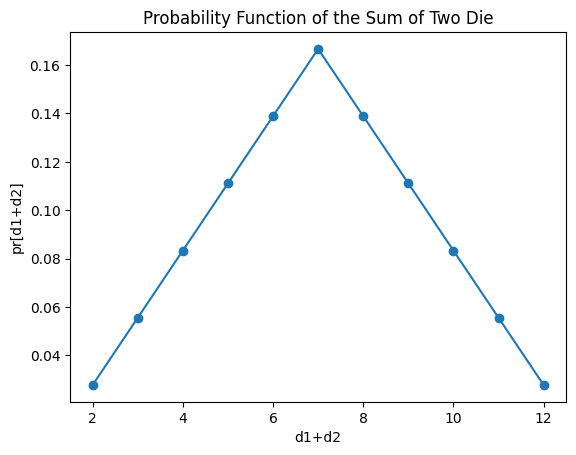

,sum,pr
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [110]:
D = [1,2,3,4,5,6]
pr = np.zeros(11)
R = np.arange(2,13,1)

for i in range(6):
    for j in range(6):
        pr[i+j] = pr[i+j]+1/36 

plt.scatter(R,pr)
plt.plot(R,pr)
plt.xlabel("d1+d2")
plt.ylabel("pr[d1+d2]")
plt.title('Probability Function of the Sum of Two Die')
plt.show()

df = pd.DataFrame({'sum':R,'pr':pr})
df

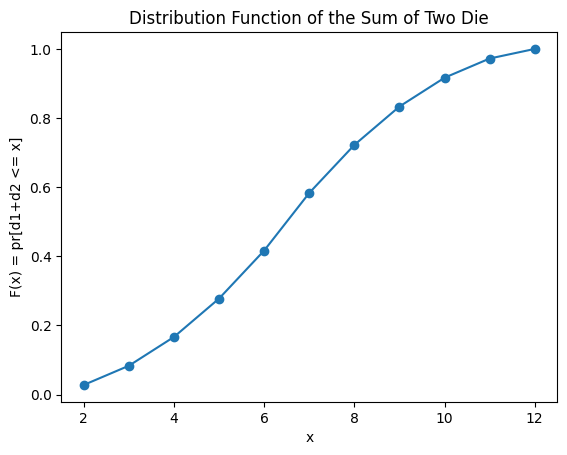

,x,F
0,2,0.027778
1,3,0.083333
2,4,0.166667
3,5,0.277778
4,6,0.416667
5,7,0.583333
6,8,0.722222
7,9,0.833333
8,10,0.916667
9,11,0.972222


In [111]:
F = np.cumsum(pr) # Cumulative summation of p

plt.scatter(R,F)
plt.plot(R,F)
plt.xlabel("x")
plt.ylabel("F(x) = pr[d1+d2 <= x]")
plt.title('Distribution Function of the Sum of Two Die')
plt.show()

df = pd.DataFrame({'x':R,'F':F})
df


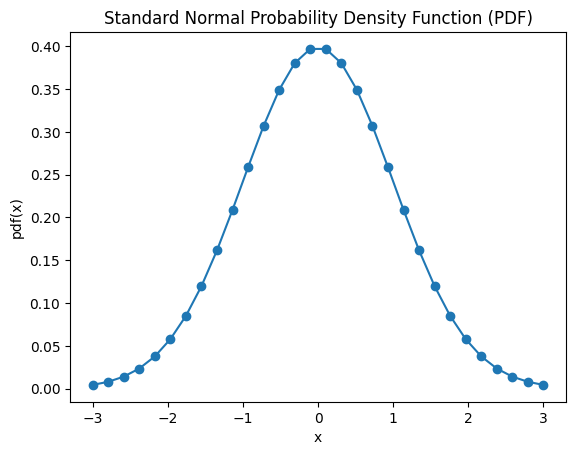

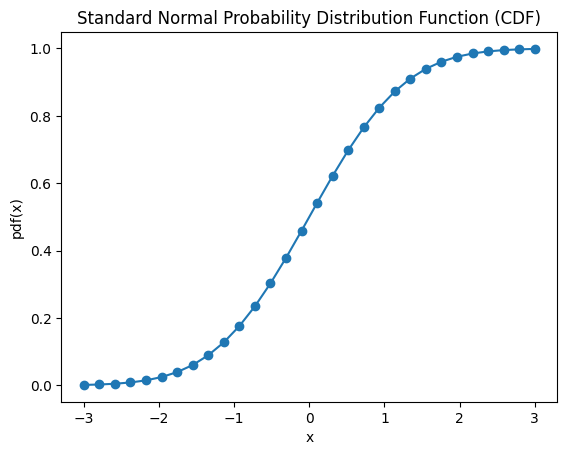

In [112]:
from scipy.stats import norm

grid = np.linspace(-3,3,30)
pdf = norm.pdf(grid)
cdf = norm.cdf(grid)

plt.scatter(grid,pdf)
plt.plot(grid,pdf)
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title('Standard Normal Probability Density Function (PDF)')
plt.show()

plt.scatter(grid,cdf)
plt.plot(grid,cdf)
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title('Standard Normal Probability Distribution Function (CDF)')
plt.show()


## The Empirical CDF
- How do we model a distribution function $F$ using data?
- Let $L(x_i,x)=1$ if $x_i \le x$ and 0 if $x_i>x$; "if $x_i$ is **L**ess than $x$, then $L$ equals 1, and $L$ equals 0 otherwise"
- The *empirical cumulative distribution function* (ECDF) is 
$$
F_n(x) = \dfrac{1}{n} \sum_{i=1}^n L(x_i,x)
$$
- This is just a sample proportion for each $x$; this is a cousin of the histogram (representing the distribution function rather than the density function)


## Convergence of the ECDF
- **Holding $x$ fixed, the LLN implies that the ECDF $F_n(x)$ converges in probability to the true CDF $F(x)$ as our sample size $n$ gets large**
- **We can use the ECDF and the LLN to estimate distributions of random variables**: It's not just statistics like the mean or variance, it's the whole distribution of the random variable
- (A much stronger statement called the Glivenko-Cantelli Theorem is also true: $\max_x | F_n(x) - F(x) | \rightarrow_{pr} 0$, so that convergence is uniform in probability)

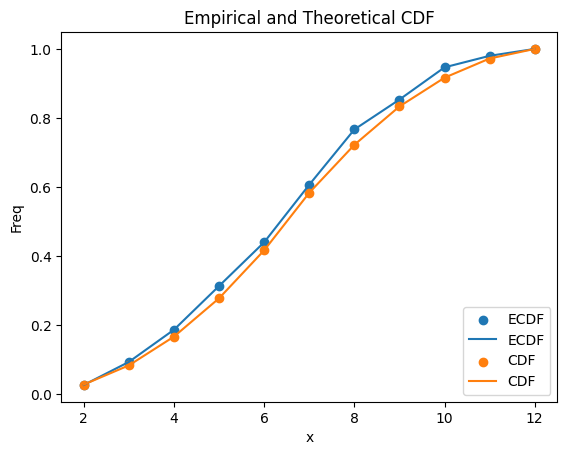

In [113]:
## ECDF, Dice Example, 50 rolls

R = np.arange(2,13,1)
faces = np.array([1,2,3,4,5,6]) 
N = 150
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
roll = d1+d2
ecdf = np.zeros(11)

for i in range(11):
    ecdf[i] = (1/N)*np.sum( roll <= R[i] )

plt.scatter(R,ecdf,label='ECDF')
plt.plot(R,ecdf,label='ECDF')
plt.scatter(R,F,label='CDF')
plt.plot(R,F,label='CDF')
plt.xlabel("x")
plt.ylabel("Freq")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()


## Seaborn
- To make an ECDF plot in seaborn, you can use the `sns.ecdfplot(data,x)` function
  

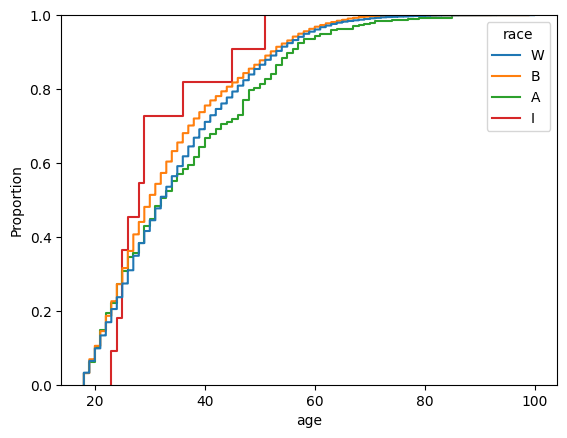

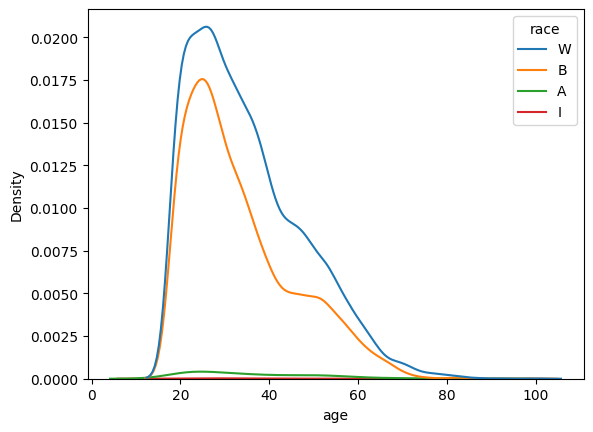

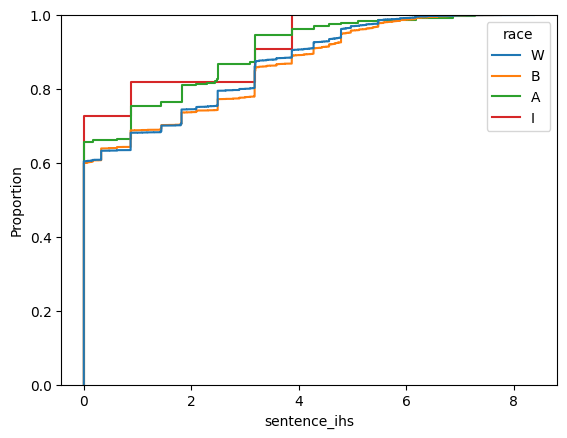

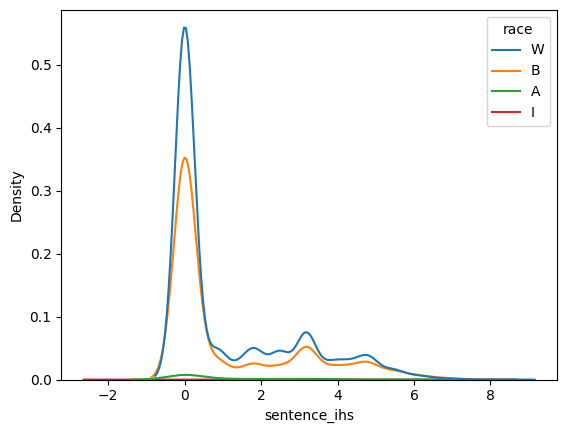

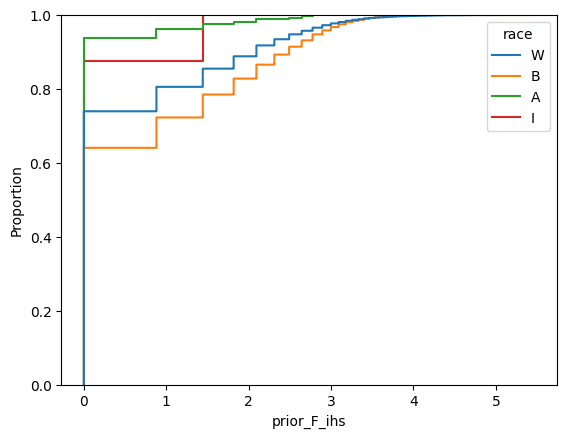

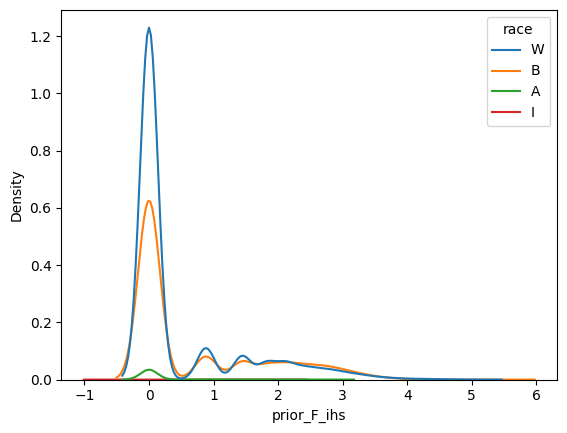

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA,sentence_ihs,prior_F_ihs
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True,NaN,0.000000
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False,4.787561,3.259573
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False,3.179785,0.000000
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False,0.871173,0.000000
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True,0.000000,0.000000


In [114]:
## ECDF Example: Pretrial Data

ldf = pd.read_csv('./data/pretrial_data.csv')
ldf['sentence_ihs'] = np.arcsinh(ldf['sentence'])
ldf['prior_F_ihs'] = np.arcsinh(ldf['prior_F'])

sns.ecdfplot(data=ldf,x='age',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='age',hue='race')
plt.show()

sns.ecdfplot(data=ldf,x='sentence_ihs',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='sentence_ihs',hue='race')
plt.show()

sns.ecdfplot(data=ldf,x='prior_F_ihs',hue='race')
plt.show()

sns.kdeplot(data=ldf,x='prior_F_ihs',hue='race')
plt.show()

ldf.head()

## Quantiles and the CDF
- On the $y$ axis, there are numbers between 0 and 1. On the $x$ axis, there are the range of values that the data take.
- To get the $q$ quantile, you trace the $q/100$ value from the $y$ axis to the graph, then down to the $x$ axis
- The median sentence is 12 days; the 75th quantile for Black and white defendants is about 36 days
- This shows how the data are spread out in a slightly different way than a kernel density plot
- We will need to be able to get these values from a vector of values in a minute
- (The quantile function is the inverse of the empirical CDF function)

## Getting the Quantiles in Python
- You can use `df[var].quantile(q)` to get a list `q` of quantiles for variable `var`

In [115]:
# Quantiles overall:
print( ldf['sentence'].quantile(q=[.10,.25,.5,.75,.9]) )

# By groups:
print( ldf['sentence'].groupby(ldf['race']).quantile(q=[.10,.25,.5,.75,.9]) )

0.10     0.000000
0.25     0.000000
0.50     0.000000
0.75     5.000000
0.90    24.328542
Name: sentence, dtype: float64
race      
A     0.10     0.000000
      0.25     0.000000
      0.50     0.000000
      0.75     0.985626
      0.90    12.000000
B     0.10     0.000000
      0.25     0.000000
      0.50     0.000000
      0.75     6.000000
      0.90    36.000000
I     0.10     0.000000
      0.25     0.000000
      0.50     0.000000
      0.75     0.492813
      0.90    12.000000
W     0.10     0.000000
      0.25     0.000000
      0.50     0.000000
      0.75     4.000000
      0.90    24.000000
Name: sentence, dtype: float64


# Bootstrapping

## Simulating Uncertainty
- Assume the data are iid: Each observation $x_i$ is determined independently of the other observations $x_j$, $j\neq i$
- Suppose we've fit a model, and want to know how uncertain we should be about its performance. In particular, there's some statistic $S$ about which you are interested (e.g. the variance of the predictions, the value of a regression coefficient, the number of clusters that $k$-MC picks, etc.)
- How can we "mimic" the arrival of new data and provide estimates about the uncertainty in our models?

## The Bootstrap
- We can **bootstrap** the distribution of $m$ as follows: Pick a large number, $R$, the number of **bootstrap replications**, and
  1. Select $n$ observations at random from your data, with replacement, and call this sample $t$
  2. Compute the statistic $S_t$ for this sample, and store its value
  3. Repeat steps 1--2  for $t=1,2,...,R$, and then compute the ECDF for the stored values $(S_1, S_2, ..., S_R)$
- As $R$ and $n$ get large, our bootstrapped ECDF $F_{n,R}(T)$ of statistic $T$ will converge to the true distribution $F(T)$

## **What is happening?**
- We typically can't create new data, and this is inconvenient. We have what we have.
- If the data are iid, however, we can *mimic* the process of collecting data by resampling.
- We close our eyes and draw a new sample at random with replacement from the existing data, equal to the size of the original data set
- If you have $N$ observations, there are $N^N$ ways of doing this: That is an astronomically large number (e.g. $10^{10} = 10,000,000,000$)
- This is effectively a new sample from the same sample space: It will have different properties and values, and provide different estimates
- We can repeat this process many times, simulating a situation where we *could* create as many datasets as we wanted that have similar properties to the original
- Because of the LLN, the statistics we compute from each bootstrap dataset create an ECDF of $(S_1,...,S_R)$ that gets close to the true distribution of $T$ if (1) the data are really iid, (2) the number of draws $R$ is sufficiently large, and (3) we have a sufficiently large dataset in $n$

## The Sampling Distribution
- In statistics, the **sampling distribution** is the distribution of the thought experiment, "What if we ran this experiment thousands of times, and computed the statistic of interest each time. How would that quantity be distributed?"
- What we are doing is using our data to **simulate the sampling distribution** and try to make inferences about it and the true parameter value

# Example: Evaluating A Clinical Trial

## Randomized Controlled Trials
- We're going to evaluate a particular clinical trial, on chronic kidney disease:
    - ISCHEMIA-Chronic Kidney Disease Trial (ISCHEMIA-CKD)
    - ClinicalTrials.gov ID NCT01985360
    - Sponsor NYU Langone Health
    - Information provided by NYU Langone Health (Responsible Party)
    - Last Update Posted 2021-10-18
- The study compared a "routine invasive therapy" intended to reduce death/heart attack versus more conservative medical interventions in patients with kidney disease
- Remember, the stakes are something like: If we implement this intervention at the scale of millions of patients, how many lives are:
    - Saved because the treatment works and our experiment showed it did (Good)
    - Not lost because the treatment doesn't work and our experiment showed it doesn't work (Good)
    - Not saved because the treatment works but our experiment failed to show it did (Bad)
    - Lost because the treatment actually harms patients, but our experiment falsely suggested it works (Very bad)

<div>
<img src="./src/mortality.png" width="700"/>
</div>

In [116]:
## Reconstruct a dataframe from the outcomes table:
df = pd.DataFrame()
df_A = pd.DataFrame()
df_A['Survived'] = np.zeros(64)
df_A.loc[:59,'Survived'] = 1
df_A['Group'] = 'A'
df_B = pd.DataFrame()
df_B['Survived'] = np.zeros(92)
df_B.loc[:84,'Survived'] = 1
df_B['Group'] = 'B'
df = pd.concat([df_A,df_B],axis=0)


In [117]:
## Crosstabs, average treatment effect:
print(pd.crosstab( df['Group'], df['Survived']), '\n')

tfx = df.loc[ df['Group'] == 'A','Survived'].mean() \
    - df.loc[ df['Group'] == 'B','Survived'].mean() 
print('Estimated effect: ', np.round(tfx, 3))

Survived  0.0  1.0
Group             
A           4   60
B           7   85 

Estimated effect:  0.014


In [118]:
## Bootstrapping:
R = 1000
fx = [] # Store computed effects
for t in range(R):
    df_t = df.sample( df.shape[0], axis=0, replace=True) # Resample
    tfx_t = df_t.loc[ df_t['Group'] == 'A','Survived'].mean() \
        - df_t.loc[ df_t['Group'] == 'B','Survived'].mean() # ATE for resample
    fx.append(tfx_t) # Save new value

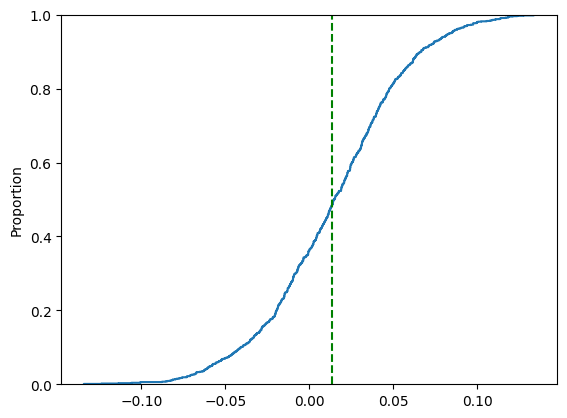

In [119]:
## ECDF plot:
ax = sns.ecdfplot(fx)
ax.axvline(x = tfx,linestyle='dashed',color='green') # Point estimate

- This is magical: We've simulated the sampling distribution for the average treatment effect
- The evidence looks weak for this intervention: The estimated effect is close to zero, and the distribution seems to exhibit a lot of uncertainty
- How can we communicate this intuition more clearly?

# Confidence Intervals

## Communicating Uncertainty: Confidence Intervals
- When we have a bootstrapped distribution, it is nice to convert the picture into numbers or some summary statement
- People often report an *$\alpha$% confidence interval*, which is the $(1-\alpha)/2$-quantile and the $[1-(1-\alpha)/2]$-quantile, where $\alpha$ is usually:
    - 90%, so the 5th and 95th quantiles 
    - 95%, so the 2.5th and 97.5th quantiles
    - 99%, so the 0.05th and 99.5th quantiles
- The value $\alpha$ is called the **confidence level**, and these are **two-tailed tests**
- This means: "If $n$ and $S$ are sufficiently large and the data are iid: $m$ will be in this interval for $\alpha$-percent of all the samples you might draw"
- This is used as a "reductio ad absurdum" argument: If values like 0 are outside the confidence interval, such a value seems inconsistent with the data we have available
- Depending on your field, the standards for evidence vary: In clinical trials, we'd like to see a 99% CI. In social science, a 90% will do.

## Confidence Interval Plot
- Let's look at 99%, 95%, and 90% confidence intervals for the RCT
- We are then curious: Is 0 inside the confidence interval?

99% Confidence Interval: ( -0.1 , 0.119 )
95% Confidence Interval: ( -0.07 , 0.097 )
90% Confidence Interval: ( -0.058 , 0.084 )


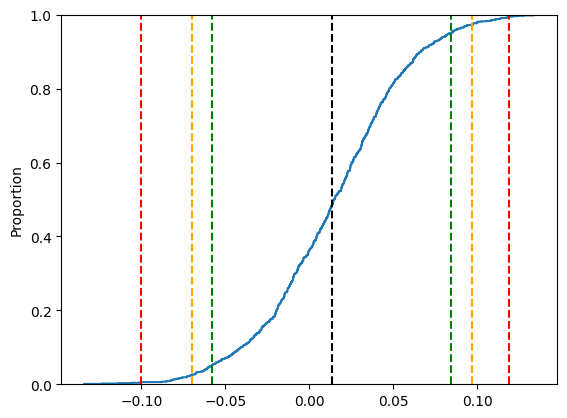

In [120]:
## Compute confidence interval:

L99 = np.round( np.quantile(fx,.005), 3)
U99 = np.round( np.quantile(fx,.995), 3)
print('99% Confidence Interval: (',L99,',',U99,')')

L95 = np.round( np.quantile(fx,.025), 3)
U95 = np.round( np.quantile(fx,.975), 3)
print('95% Confidence Interval: (',L95,',',U95,')')

L90 = np.round( np.quantile(fx,.05), 3)
U90 = np.round( np.quantile(fx,.95), 3)
print('90% Confidence Interval: (',L90,',',U90,')')

ax = sns.ecdfplot(fx)

ax.axvline(x = tfx,linestyle='dashed',color='black') # Point estimate

ax.axvline(x = L99,linestyle='dashed',color='red') # Lower bound
ax.axvline(x = U99,linestyle='dashed',color='red') # Upper bound

ax.axvline(x = L95,linestyle='dashed',color='orange') # Lower bound
ax.axvline(x = U95,linestyle='dashed',color='orange') # Upper bound

ax.axvline(x = L90,linestyle='dashed',color='green') # Lower bound
ax.axvline(x = U90,linestyle='dashed',color='green') # Upper bound

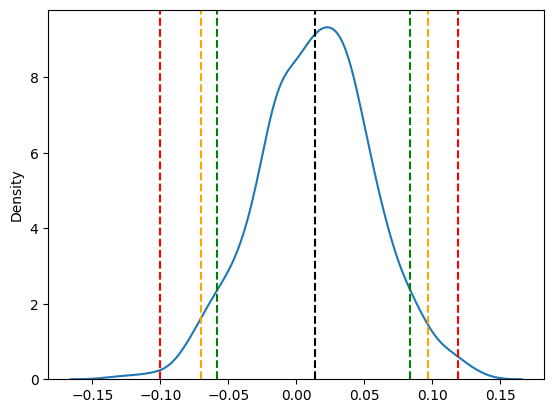

In [121]:
ax = sns.kdeplot(fx)

ax.axvline(x = tfx,linestyle='dashed',color='black') # Point estimate

ax.axvline(x = L99,linestyle='dashed',color='red') # Lower bound
ax.axvline(x = U99,linestyle='dashed',color='red') # Upper bound

ax.axvline(x = L95,linestyle='dashed',color='orange') # Lower bound
ax.axvline(x = U95,linestyle='dashed',color='orange') # Upper bound

ax.axvline(x = L90,linestyle='dashed',color='green') # Lower bound
ax.axvline(x = U90,linestyle='dashed',color='green') # Upper bound

## Hypothesis Testing
- So we arrive at the idea of a hypothesis test:
    - The null hypothesis is that the value of the parameter is zero
    - The alternative hypothesis is that the value of the parameter is not zero
- When we build a confidence interval, we are simultaneously conducting a test: "At the $\alpha$ level, is the value of the parameter statistically significantly different from zero?"
- If 0 is inside the confidence interval, we fail to reject the null hypothesis: This simulation gives us evidence that the value of the parameter is probably zero
- If 0 is outside the confidence, we reject the null hypothesis: This simulation gives us evidence that the value of the parameter is not zero
- If the level $\alpha$ goes up, the CI gets wider, and the test becomes more demanding
- In our example, we fail to reject the null for this intervention: We have evidence that the ATE is close to zero

## Interpreting a Confidence Interval/Hypothesis Test
- What does this mean?
- In 90% of the Bootstrap samples, the estimated difference was between -.055 and .076
- Zero is inside that interval, so we fail to reject the hypothesis that the true value is zero at the 90% level
- What we are saying is: "Given the data (i.e. bootstrapping), it is very unlikely (90%) that the treatment is effective--because in at least 90% of samples, 0 is inside the confidence interval"
- Confidence is honestly a strange idea, and you might temporarily quarantine it from the rest of your brain, until you know that you really understand it

## Example: Does CPR Work?

- In incidents of Out of Hospital Cardiac Arrest (OHCA), people often attempt Cardio Pulmonary Resuscitation (CPR)
- Does this work? If it does, how big is the effect size?
- In this study, 30/2071 survived:
    - Received CPR: 19/662
    - Didn't receive CRP: 11/1409
- The null hypothesis is that people who received CPR are no better off than those who didn't and die at similar rates. The alternative hypothesis is that CPR yields statistically significantly different outcomes.
- Since this matters, let's use $\alpha = .99$ and a 99% confidence interval.

In [122]:
## Generate dataframe
df_CPR = pd.DataFrame()
df_N = pd.DataFrame()
df_CPR['CPR'] = np.ones(662)
df_CPR['Survive'] = 0
df_CPR.iloc[:19,1]=np.ones(19)
df_N['CPR'] = np.zeros(1409)
df_N['Survive'] = 0
df_N.iloc[:11,1]=np.ones(11)
df = pd.concat([df_CPR,df_N],axis=0)

tab = pd.crosstab(df['CPR'], df['Survive'])
print(tab)

ate = df.loc[ df['CPR']==1, 'Survive' ].mean()-df.loc[ df['CPR']==0, 'Survive' ].mean() # Compute treatment effect

Survive     0   1
CPR              
0.0      1398  11
1.0       643  19


In [123]:
## Bootstrap
R = 2000
fx = []
for t in range(R):
    df_t = df.sample( df.shape[0], axis=0, replace=True) # Resample
    fx_t = df_t.loc[ df_t['CPR']==1, 'Survive' ].mean()-df_t.loc[ df_t['CPR']==0, 'Survive' ].mean() # Compute treatment effect
    fx.append(fx_t) # Save this iteration's results

In [124]:
CI = np.quantile(fx,[.005,.995]) # Compute 99% CI
print('Point Estimate: ', ate)
print( '99% CI: ' + str(CI) )

Point Estimate:  0.020893951056972976
99% CI: [0.0036937  0.03851631]


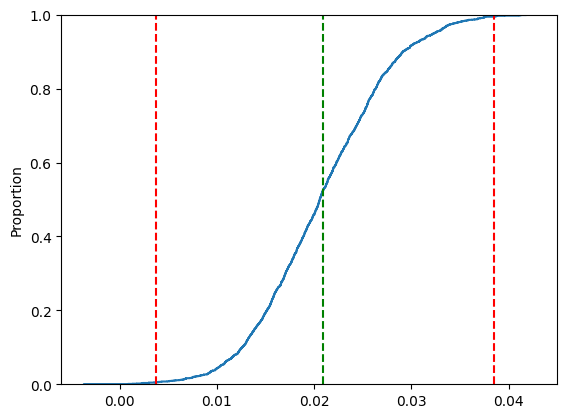

In [125]:
# ECDF of differences in rates, CI:
ax = sns.ecdfplot(fx)
ax.axvline(x = ate,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

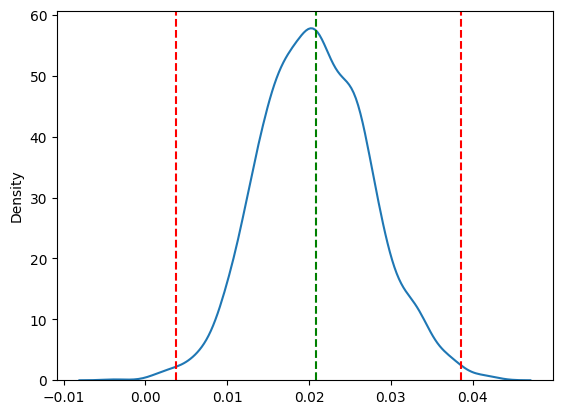

In [126]:
# Density plot of differences in rates, CI:
ax = sns.kdeplot(fx)
ax.axvline(x = ate,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

- In this case, 0.00 is outside the 90, but the lower bound is very close to zero
- The point estimate is only .02: If you receive CPR, you are only 2% more likely to survive the heart attack...
- Is that crazy?
    - https://www.theatlantic.com/health/archive/2012/07/are-doctors-more-likely-to-refuse-cpr/260381/
    - "Are doctors more likely to refuse revival in the event of cardiac arrest? In the Hopkins study, 90 percent of doctors said they'd rather die by cardiac arrest than be resuscitated."
- In economics, we distinguish between the "statistical significance" revealed by testing, but also the "economic significance" of the results: The cost benefit analysis for CPR seems weak
- I am not saying you should refuse CPR or not provide it. It's just interesting that we place so much emphasis on this procedure which, although it delivers a positive benefit, that benefit is extremely small.

# Example: Regression and $p$-Values

## Uncertainty in Model Parameters
- Problem: I have my data $(y,X)$ and a model $y = b\cdot X$. I want to quantify the uncertainty about the estimated coefficients in the model, say $\hat{b}$.
- Solution: I can resample the data $(y,X)$ and run the regression on each bootstrap sample, creating a sequence of estimates $(\hat{b}^1, \hat{b}^2, ... , \hat{b}^S)$ to see how "noisy" the coefficient $\hat{b}$ is and construct confidence intervals
- We'll use housing price data with house characteristics

## Asymptotic Confidence Intervals
- Typically, you get CIs from the regression software, and they are computed deterministically using the statistical properties of your estimator and the central limit theorem
- The interpretation of these CIs is: ""
- If you look closely, that's exactly bootstrapping
- So whenever you see CIs, you can interpret them like a bootstrap CI: "In $\alpha$-% of samples, the estimated value of the statistic $T$ is in this interval with probability $\alpha$."
- This is not the same thing as saying "With probability $1-\alpha$, the value being estimated by $T$ is in this interval." In fact, the parameter estimated by $T$ is not random, so statements about the probability it is in one range or another are just a category error from the perspective of frequentist statistics.

## Example: Regression Coefficients
- Problem: I have my data $(y,X)$ and a model $y = b\cdot X$. I want to quantify the uncertainty about the estimated coefficients in the model, say $\hat{b}$.
- Solution: I can resample the data $(y,X)$ and run the regression on each bootstrap sample, creating a sequence of estimates $(\hat{b}^1, \hat{b}^2, ... , \hat{b}^S)$ to see how "noisy" the coefficient $\hat{b}$ is and construct confidence intervals
- We'll use housing price data with house characteristics

In [127]:
df = pd.read_csv('./data/CardiacPatientData.csv')
print(df.shape)
df.head()

(5906, 20)


,ID,SBP,DBP,HR,RR,BT,SpO2,Age,Gender,GCS,Na,K,Cl,Urea,Ceratinine,Alcoholic,Smoke,FHCD,TriageScore,Outcome
0,1,163,95,90,18,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
1,1,134,85,85,15,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
2,1,121,77,80,19,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
3,1,103,78,70,16,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
4,1,96,70,59,13,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1


In [128]:
np.sum(df.isna(), axis=0) # Missing values

ID                0
SBP               0
DBP               0
HR                0
RR                0
BT                0
SpO2              0
Age               0
Gender            0
GCS               0
Na             3244
K              3244
Cl             3248
Urea           3320
Ceratinine     3261
Alcoholic      1751
Smoke          1752
FHCD           1621
TriageScore    1903
Outcome           0
dtype: int64

In [129]:
df = df.drop(['Na','K', 'Cl', 'Urea','Ceratinine',
         'Alcoholic','Smoke','FHCD',
         'TriageScore'], axis=1)

In [130]:
## Logistic regression:

from sklearn.linear_model import LogisticRegression

## Data:
y = df['Outcome']
X = df.drop(['ID','Outcome'], axis=1)

## Normalize features:
def maxmin(z):
    z = (z-np.min(z))/(np.max(z)-np.min(z))
    return z
X = X.apply(maxmin)


LR = LogisticRegression(penalty=None)
LR = LR.fit(X,y)
y_hat = LR.predict_proba(X)
y_hat =  [y_hat[i][1] for i in range(len(y_hat)) ]

pd.DataFrame({'variable':LR.feature_names_in_,
                                  'coefficient':LR.coef_[0]})

,variable,coefficient
0,SBP,15.519748
1,DBP,1.643430
2,HR,-30.170863
3,RR,-7.122063
4,BT,0.409875
5,SpO2,25.890205
6,Age,-5.360193
7,Gender,-0.756309
8,GCS,-0.763571


In [131]:
## Bootstrapping:
R = 1000
fx = []
for t in range(R):
    df_t = df.sample( df.shape[0], axis=0, replace=True) # Resample
    ## Repeat the analysis:
    y_t = df_t['Outcome']
    X_t = df_t.drop(['ID','Outcome'], axis=1)
    X_t = X_t.apply(maxmin)
    LR_t = LogisticRegression(penalty=None)
    LR_t = LR_t.fit(X_t,y_t)
    ## Save the results:
    fx.append(LR_t.coef_[0])

Variable:  SBP
Estimate:  15.51974771345367
95% Confidence Interval: ( 7.12 , 17.63 )


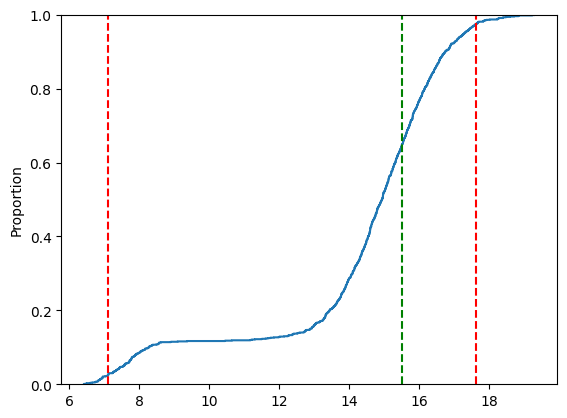

Variable:  DBP
Estimate:  1.643430276468007
95% Confidence Interval: ( -1.701 , 5.785 )


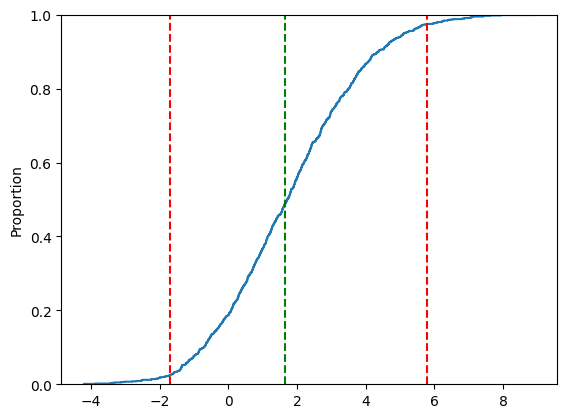

Variable:  HR
Estimate:  -30.170862798011385
95% Confidence Interval: ( -32.128 , -11.594 )


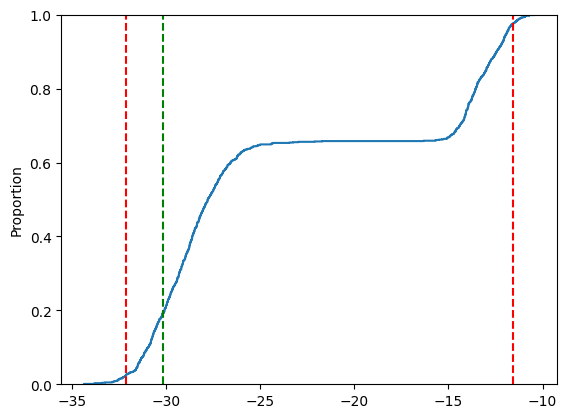

Variable:  RR
Estimate:  -7.122062826463804
95% Confidence Interval: ( -9.552 , -4.967 )


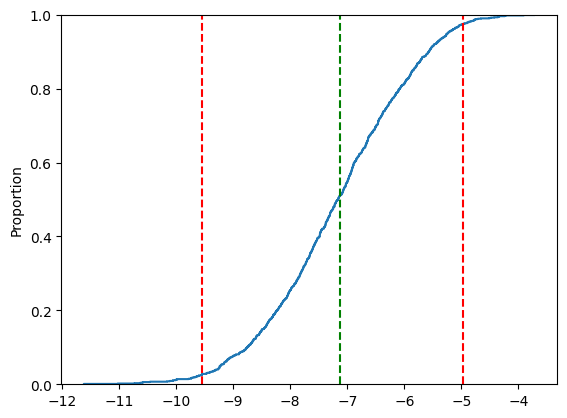

Variable:  BT
Estimate:  0.409874515663144
95% Confidence Interval: ( -0.586 , 1.232 )


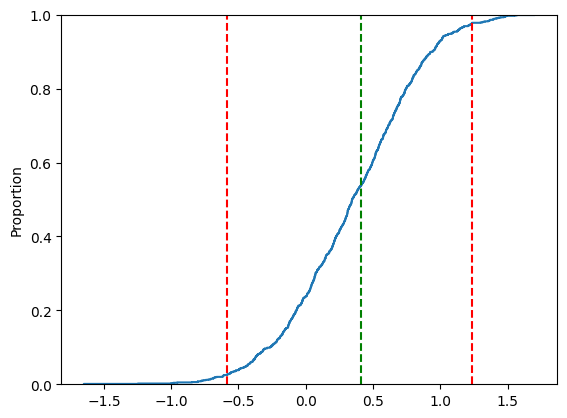

Variable:  SpO2
Estimate:  25.890204727106212
95% Confidence Interval: ( 20.512 , 29.81 )


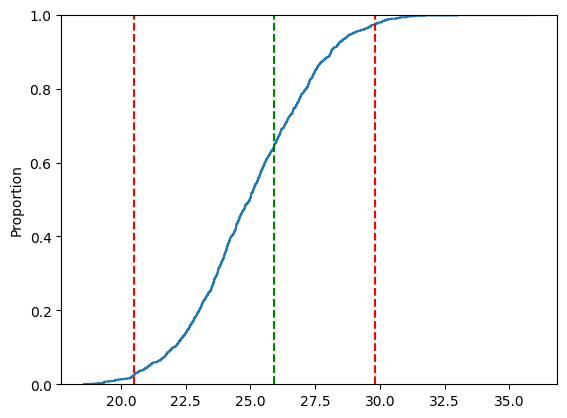

Variable:  Age
Estimate:  -5.360192890351469
95% Confidence Interval: ( -5.914 , -4.804 )


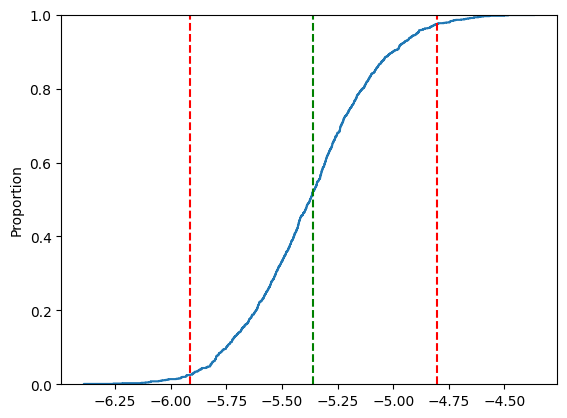

Variable:  Gender
Estimate:  -0.7563090935760937
95% Confidence Interval: ( -1.014 , -0.536 )


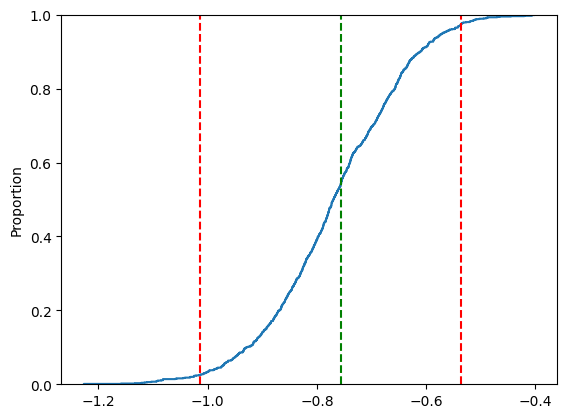

Variable:  GCS
Estimate:  -0.7635709092401775
95% Confidence Interval: ( -1.586 , -0.018 )


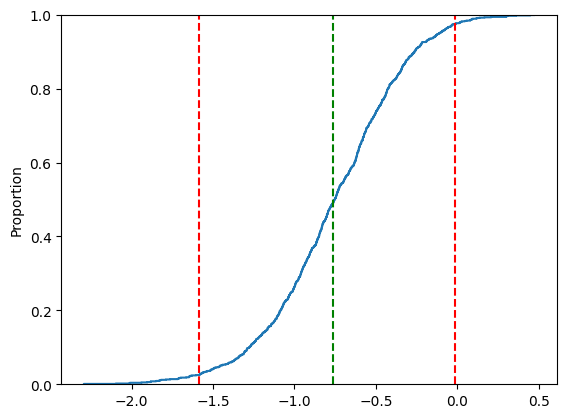

In [132]:
## Analyze regression coefficients:
for k in range(len(LR.feature_names_in_)):
    print('Variable: ', LR.feature_names_in_[k])
    print('Estimate: ', LR.coef_[0][k])
    values = [ fx[i][k] for i in range(len(fx)) ]

    ## Compute confidence interval:
    L = np.round( np.quantile(values,.025), 3)
    U = np.round( np.quantile(values,.975), 3)
    print('95% Confidence Interval: (',L,',',U,')')

    ## ECDF plot:
    ax = sns.ecdfplot(values)
    ax.axvline(x = LR.coef_[0][k],linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = L,linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = U,linestyle='dashed',color='red') # Upper bound
    plt.show()

##  $p$-Values
- The ECDF and confidence intervals are interesting and nuanced
- When you have a lot of coefficients, it's nice to reduce it down to a single number
- The $p$-value is the answer to the question, "At what value of $1-\alpha$ does the regression parameter just barely become statistically significant?"
- So, we relax our demands from $\alpha = 90, 95, 99$ to whatever $\alpha$ kicks 0 out of the $\alpha$-level confidence interval
- The $p$-value is just a way of asking, "What's the tightest confidence interval for which the parameter is statistically significantly different from zero? What's the lowest level of a hypothesis test we can adopt, for which we reject the null hypothesis?"
- These are, oddly, a point of contention in some fields

## Asymptotic Results
- Instead of bootstrapping, statistics packages often assume that the sampling distribution is roughly normal (this is justified by the Central Limit Theorem)
- Then, the confidence intervals and $p$-values can be computed from plug-in formulas, rather than simulated from data
- This came first: Confidence was invented by Fisher in the 1920's and Neyman/Pearson in the 1930's, and Bootstrapping was invented by Efron in the 1970's/1980's

In [133]:
import statsmodels.api as sm
LR = sm.Logit(y,X).fit()
LR.summary()

Optimization terminated successfully.
         Current function value: 0.231117
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                 5906
Model:                          Logit   Df Residuals:                     5897
Method:                           MLE   Df Model:                            8
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.4403
Time:                        12:41:13   Log-Likelihood:                -1365.0
converged:                       True   LL-Null:                       -2438.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SBP           14.5698      1.357     10.737      0.000      11.910      17.229
DBP            2.2168      4.594      0.483      0.629      -6.787      11.221
HR           -31.8547      1.362    -23.382      0.000     -34.525     -29.184
RR            -8.7511      0.810    -10.804      0.000     -10.339      -7.164
BT            -1.4985      0.617     -2.431      0.015      -2.707      -0.290
SpO2          12.0436      0.609     19.769      0.000      10.850      13.238
Age           -5.6493      0.316    -17.850      0.000      -6.270      -5.029
Gender        -0.6646      0.123     -5.389      0.000      -0.906      -0.423
GCS           -0.8970      0.583     -1.540      0.124      -2.039       0.245
==============================================================================
"""

## Stats Detour: Central Limit Theorem
- The concept of bootstrapping actually replaces a classic idea in statistics: the Central Limit Theorem or CLT
- Suppose $x_1, x_2, ..., x_n$ is an iid sequence with sample mean $\bar{X}_n = \dfrac{1}{n} \sum_{i=1}^n x_i$. Each $x_i$ has mean $\mu$ and variance $\sigma^2$.
- Then as the sample size gets large, the value of $\sqrt{n}(\bar{X}_n - \mu)$ converges in distribution to a Normal distribution with mean 0 and variance $\sigma^2$.
- Before computers became as powerful as they are now, the CLT allowed people to approximate the sampling distribution of a statistic by computing things like sample means and variances and plugging them into a formula; this is still very popular

# Prediction and Confidence

## Using Inference in Prediction
- This all suggests a nice procedure: Bootstrap the model and make predictions based on each of the models we build, then look at an $\alpha$% interval the predictions we make
- This is called a **prediction interval**: We are looking at the sampling distribution of the predicted value for a given observation or set of observations
- This allows us to address our uncertainty in a responsible, deliberate way
- People often claim that inference and prediction do not mix. What about inference about predictions?

[Text(0.5, 1.0, 'Density of Predictions')]

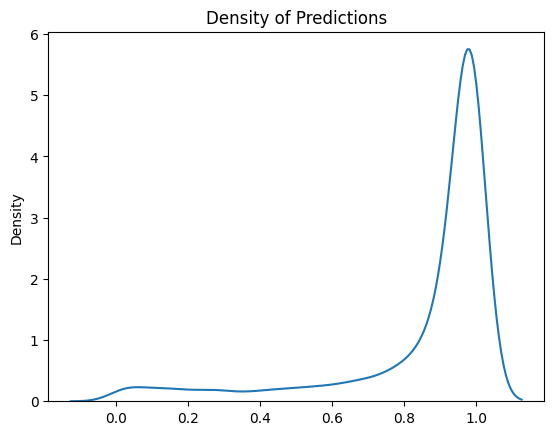

In [134]:
sns.kdeplot(x=y_hat).set(title='Density of Predictions')

In [135]:
## Prediction Interval

## Bootstrapping:
R = 1000
fx = []
for t in range(R):
    df_t = df.sample( df.shape[0], axis=0, replace=True) # Resample
    ## Repeat the analysis:
    y_t = df_t['Outcome']
    X_t = df_t.drop(['ID','Outcome'], axis=1)
    X_t = X_t.apply(maxmin)
    LR_t = LogisticRegression(penalty=None)
    LR_t.fit(X_t,y_t)
    y_hat_t = LR_t.predict_proba(X_t)
    y_hat_t =  [y_hat_t[i][1] for i in range(len(y_hat_t)) ]
    ## Save the results:
    fx.append(y_hat_t)

In [ ]:
# Construct PI's for each observation:
CI = []
for i in range(len(y_hat)):
    Y_i = [ fx[k][i] for k in range(len(fx))]
    CI.append(np.quantile(Y_i, [.05, .95]))

<Axes: >

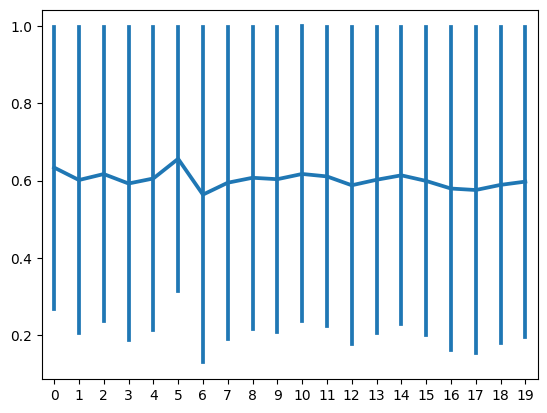

In [137]:
sns.pointplot(CI[:20], marker=None) # First 20 PIs

- These results are bad: The 90% prediction intervals are quite wide
- We would not want to use this model in practice
- This can paint a different picture from just looking at confusion tables or $R^2$

## Example: College Admissions

## High Stakes Example
- Let's analyze the admissions and acceptance statistics for a prestigious public university: Over time, do offer rates vary to different racial/ethnic groups? To male/female applicants?
- I am not making normative/moral statements about who should or should not be accepted/matriculate, I am trying to determine whether or not trends even exist, and what the strength of the evidence for them is
- The analysis will be done on a year-by-year basis, to make it a bit more interesting

In [138]:
df = pd.read_csv('./data/admit_by_race.csv')
df.loc[:,['applications','race']].groupby('race').describe()

applications                \
                                                 count          mean   
race                                                                   
American Indian or Alaska Native                   9.0     42.444444   
Asian                                              9.0   6963.555556   
Black or African American                          9.0   2903.111111   
Hispanic                                           9.0   3880.000000   
International                                      9.0   5281.111111   
Multi-Race                                         9.0   2194.333333   
Native Hawaiian or Other Pacific Islander          9.0     27.444444   
Race and Ethnicity Unknown                         9.0   2268.666667   
White                                              9.0  21154.000000   
all                                                9.0  44714.666667   

                                                                          \
                                                   std      min      25%   
race                                                                       
American Indian or Alaska Native             10.978514     24.0     38.0   
Asian                                      2437.620823   3991.0   5008.0   
Black or African American                   779.259335   2074.0   2271.0   
Hispanic                                   1216.026521   2427.0   2906.0   
International                               922.566724   4230.0   4732.0   
Multi-Race                                  688.443171   1258.0   1714.0   
Native Hawaiian or Other Pacific Islander     6.385748     20.0     23.0   
Race and Ethnicity Unknown                  458.407297   1882.0   2021.0   
White                                      3076.160960  16352.0  18746.0   
all                                        9307.788553  32377.0  37182.0   

                                                                      
                                               50%      75%      max  
race                                                                  
American Indian or Alaska Native              42.0     43.0     63.0  
Asian                                       6473.0   8384.0  10929.0  
Black or African American                   2548.0   3287.0   4138.0  
Hispanic                                    3438.0   4487.0   5953.0  
International                               4918.0   5999.0   6961.0  
Multi-Race                                  1959.0   2581.0   3263.0  
Native Hawaiian or Other Pacific Islander     27.0     29.0     41.0  
Race and Ethnicity Unknown                  2126.0   2267.0   3357.0  
White                                      20156.0  23541.0  25295.0  
all                                        40879.0  50926.0  58951.0

In [139]:
df['offer_rate'] = df['offers']/df['applications']
df.loc[:,['offer_rate','race']].groupby('race').describe()

offer_rate                      \
                                               count      mean       std   
race                                                                       
American Indian or Alaska Native                 9.0  0.194758  0.104514   
Asian                                            9.0  0.258002  0.045600   
Black or African American                        9.0  0.287928  0.061987   
Hispanic                                         9.0  0.223283  0.053930   
International                                    9.0  0.149427  0.030020   
Multi-Race                                       9.0  0.259646  0.053833   
Native Hawaiian or Other Pacific Islander        9.0  0.128639  0.126357   
Race and Ethnicity Unknown                       9.0  0.264081  0.047394   
White                                            9.0  0.219684  0.054315   
all                                              9.0  0.225824  0.047056   

                                                                         \
                                                min       25%       50%   
race                                                                      
American Indian or Alaska Native           0.083333  0.095238  0.240741   
Asian                                      0.202946  0.220539  0.249807   
Black or African American                  0.152972  0.289639  0.295260   
Hispanic                                   0.159402  0.193487  0.210006   
International                              0.104583  0.116519  0.161029   
Multi-Race                                 0.172541  0.221232  0.281266   
Native Hawaiian or Other Pacific Islander  0.068966  0.076923  0.093750   
Race and Ethnicity Unknown                 0.215054  0.223086  0.246920   
White                                      0.152797  0.167574  0.217649   
all                                        0.168089  0.186604  0.225813   

                                                               
                                                75%       max  
race                                                           
American Indian or Alaska Native           0.255814  0.333333  
Asian                                      0.298323  0.323728  
Black or African American                  0.327869  0.353832  
Hispanic                                   0.258087  0.318500  
International                              0.165680  0.188416  
Multi-Race                                 0.303967  0.320350  
Native Hawaiian or Other Pacific Islander  0.097561  0.464286  
Race and Ethnicity Unknown                 0.298291  0.341658  
White                                      0.266670  0.304061  
all                                        0.264321  0.298607

In [140]:
df.loc[:,['offers','year']].groupby('year').describe()

offers                                                            
      count    mean          std   min     25%    50%      75%      max
year                                                                   
2016   10.0  1933.3  3071.137468   2.0  463.00  772.0  1168.25   9668.0
2017   10.0  2010.9  3194.666926   2.0  516.25  762.5  1279.25  10058.0
2018   10.0  1965.6  3116.601611  11.0  534.75  715.0  1316.50   9828.0
2019   10.0  1955.5  3067.207715   2.0  564.50  740.0  1384.75   9778.0
2020   10.0  1845.9  2880.739429   2.0  513.50  703.0  1418.50   9231.0
2021   10.0  1990.0  3080.031746   2.0  561.75  820.0  1563.00   9951.0
2022   10.0  1900.1  2905.572097   3.0  571.75  797.5  1625.50   9503.0
2023   10.0  1906.4  2914.255354   2.0  509.00  794.5  1777.50   9533.0
2024   10.0  1981.7  3037.812958   4.0  580.50  726.5  1905.50   9909.0

In [141]:
## Generate "data":

offer_results = pd.DataFrame()
yield_results = pd.DataFrame()

years = df['year'].unique()
for y in years :
    df_y = df.loc[ df['year'] == y, : ]
    df_y = df_y.reset_index()

    app_y = pd.DataFrame()
    for r in range(df_y.shape[0]):
        temp = pd.DataFrame()
        #
        temp['offers'] = np.zeros( df_y.loc[r,'applications'])
        n_accepted = df_y.loc[r,'offers']-1
        temp.loc[:n_accepted,'offers'] = 1
        #
        temp['enrolled'] = 0
        n_enrolled = df_y.loc[r,'enrolled']-1
        temp.loc[:n_enrolled,'enrolled'] = 1
        #
        temp['race'] = df_y.loc[r,'race']
        #
        app_y = pd.concat([app_y,temp],axis=0)

        ## Bootstrap:
    R = 1000
    offer_rates = []
    yield_rates = []
    for t in range(R):
        df_t = app_y.sample( app_y.shape[0], axis=0, replace=True) 
        offers_t = df_t.loc[:,['race','offers']].groupby('race').sum()
        yield_t = df_t.loc[ df_t['offers'] == 1 ,['race','enrolled']].groupby('race').sum()
        offer_rates.append(offers_t)
        yield_rates.append(yield_t)

    flat_offers = pd.DataFrame( [ offer_rates[k]['offers'] for k in range(len(offer_rates)) ] )
    L = [ np.quantile(flat_offers.iloc[:,k],.05) for k in range(flat_offers.shape[1]) ]
    U = [ np.quantile(flat_offers.iloc[:,k],.95) for k in range(flat_offers.shape[1]) ]
    P = [ np.mean(flat_offers.iloc[:,k]) for k in range(flat_offers.shape[1]) ]
    offer_result = pd.DataFrame({'group':flat_offers.columns,'lower':L,'upper':U,'estimate':P,'year':y})
    offer_results = pd.concat([offer_results, offer_result],axis=0)

    flat_yield = pd.DataFrame( [ yield_rates[k]['enrolled'] for k in range(len(yield_rates)) ] )
    L = [ np.quantile(flat_yield.iloc[:,k],.05) for k in range(flat_yield.shape[1]) ]
    U = [ np.quantile(flat_yield.iloc[:,k],.95) for k in range(flat_yield.shape[1]) ]
    P = [ np.mean(flat_yield.iloc[:,k]) for k in range(flat_yield.shape[1]) ]
    yield_result = pd.DataFrame({'group':flat_yield.columns,'lower':L,'upper':U,'estimate':P,'year':y})
    yield_results = pd.concat([yield_results, yield_result],axis=0)


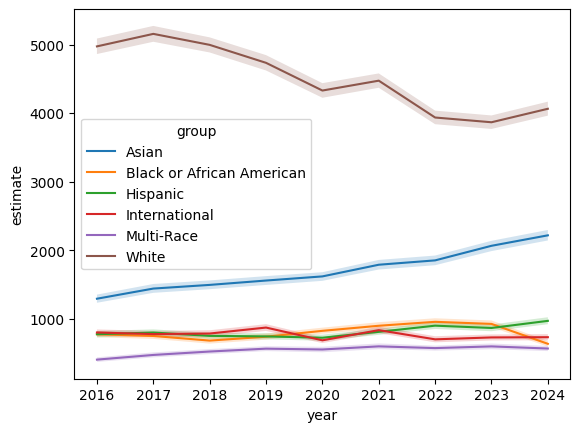

In [142]:
  # Plot results
gdf = offer_results.loc[ offer_results['group'].isin(['Asian','Hispanic','Black or African American','Multi-Race','White','International']), :]
ax = sns.lineplot(data=gdf, x='year', y='estimate', hue='group' )
for gr in gdf['group'].unique():
    tdf = gdf.loc[ gdf['group']==gr, :]
    ax.fill_between(data = tdf, x='year', y1 = 'lower', y2='upper', alpha=0.2)
plt.show()

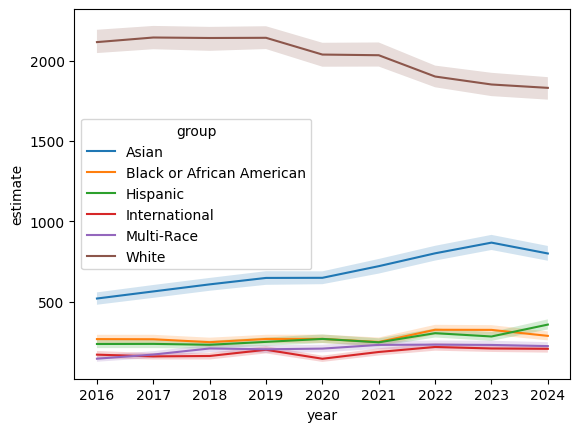

In [143]:
gdf = yield_results.loc[ yield_results['group'].isin(['Asian','Hispanic','Black or African American','Multi-Race','White','International']), :]
ax = sns.lineplot(data=gdf, x='year', y='estimate', hue='group' )
for gr in gdf['group'].unique():
    tdf = gdf.loc[ gdf['group']==gr, :]
    ax.fill_between(data = tdf, x='year', y1 = 'lower', y2='upper', alpha=0.2)

## Admissions Results by Race
- White offers and enrollment tend to be trending down over time
- Black/AA enrollment is trending up, then falls from 2023 to 2024; offers don't seem to move much
- Asian offers are trending up over time, but enrollment drops off in 2023 to 2024
- We don't have a "why" from this: Supreme Court decisions in 2023 probably played a role, and that would be our next steps
- Some of this would work better as percentages rather than levels, especially at the enrollment stage
- The impact of Covid-19 doesn't seem that pronounced?

In [144]:
df = pd.read_csv('./data/admit_by_sex.csv')
print(df.head())

df['offer_rate'] = df['offers']/df['applications']
df.loc[:,['offer_rate','sex']].groupby('sex').describe()


      sex  applications  offers  enrolled  year
0     all         32377    9668      3683  2016
1  Female         17048    5268      1985  2016
2    Male         15329    4400      1698  2016
3     all         36779   10058      3788  2017
4  Female         19359    5463      2121  2017


offer_rate                                                              \
            count      mean       std       min       25%       50%       75%   
sex                                                                             
Female        9.0  0.234076  0.048686  0.174436  0.194259  0.234053  0.275362   
Male          9.0  0.216377  0.045599  0.159049  0.177452  0.216445  0.252058   
all           9.0  0.225824  0.047056  0.168089  0.186604  0.225813  0.264321   

                  
             max  
sex               
Female  0.309010  
Male    0.287038  
all     0.298607

In [145]:
offer_results = pd.DataFrame()
yield_results = pd.DataFrame()

years = df['year'].unique()
for y in years :
    df_y = df.loc[ df['year'] == y, : ]
    df_y = df_y.reset_index()

    ## Generate dataset:
    app_y = pd.DataFrame()
    for r in range(df_y.shape[0]):
        temp = pd.DataFrame()
        temp['offers'] = np.zeros( df_y.loc[r,'applications'])
        n_accepted = df_y.loc[r,'offers']-1
        temp.loc[:n_accepted,'offers'] = 1
        temp['enrolled'] = 0
        n_enrolled = df_y.loc[r,'enrolled']-1
        temp.loc[:n_enrolled,'enrolled'] = 1
        temp['sex'] = df_y.loc[r,'sex']
        app_y = pd.concat([app_y,temp],axis=0)

    ## Bootstrap:
    R = 1000
    offer_rates = []
    yield_rates = []
    for t in range(R):
        df_t = app_y.sample( app_y.shape[0], axis=0, replace=True) 
        offers_t = df_t.loc[:,['sex','offers']].groupby('sex').sum()
        yield_t = df_t.loc[ df_t['offers'] == 1 ,['sex','enrolled']].groupby('sex').sum()
        offer_rates.append(offers_t)
        yield_rates.append(yield_t)

    ## Clean up results, compute statistics:
    flat_offers = pd.DataFrame( [ offer_rates[k]['offers'] for k in range(len(offer_rates)) ] )
    L = [ np.quantile(flat_offers.iloc[:,k],.05) for k in range(flat_offers.shape[1]) ]
    U = [ np.quantile(flat_offers.iloc[:,k],.95) for k in range(flat_offers.shape[1]) ]
    P = [ np.mean(flat_offers.iloc[:,k]) for k in range(flat_offers.shape[1]) ]
    offer_result = pd.DataFrame({'group':flat_offers.columns,'lower':L,'upper':U,'estimate':P,'year':y})
    offer_results = pd.concat([offer_results, offer_result],axis=0)

    flat_yield = pd.DataFrame( [ yield_rates[k]['enrolled'] for k in range(len(yield_rates)) ] )
    L = [ np.quantile(flat_yield.iloc[:,k],.05) for k in range(flat_yield.shape[1]) ]
    U = [ np.quantile(flat_yield.iloc[:,k],.95) for k in range(flat_yield.shape[1]) ]
    P = [ np.mean(flat_yield.iloc[:,k]) for k in range(flat_yield.shape[1]) ]
    yield_result = pd.DataFrame({'group':flat_yield.columns,'lower':L,'upper':U,'estimate':P,'year':y})
    yield_results = pd.concat([yield_results, yield_result],axis=0)

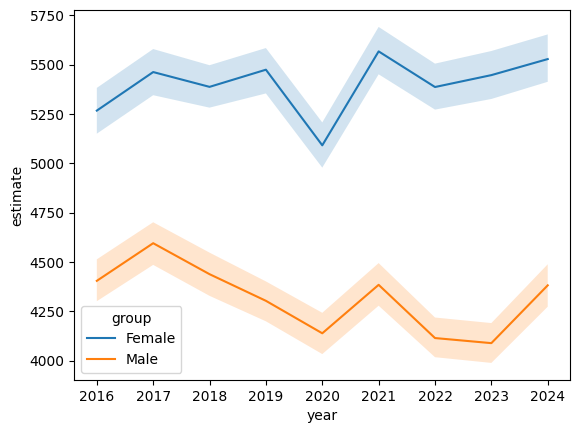

In [146]:
# Plot results
gdf = offer_results.loc[ offer_results['group'].isin(['Male','Female']), :]
ax = sns.lineplot(data=gdf, x='year', y='estimate', hue='group' )
for gr in gdf['group'].unique():
    tdf = gdf.loc[ gdf['group']==gr, :]
    ax.fill_between(data = tdf, x='year', y1 = 'lower', y2='upper', alpha=0.2)

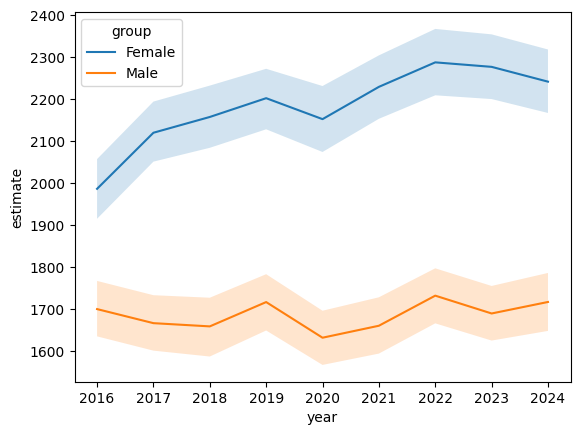

In [147]:
# Plot results
gdf = yield_results.loc[ offer_results['group'].isin(['Male','Female']), :]
ax = sns.lineplot(data=gdf, x='year', y='estimate', hue='group' )
for gr in gdf['group'].unique():
    tdf = gdf.loc[ gdf['group']==gr, :]
    ax.fill_between(data = tdf, x='year', y1 = 'lower', y2='upper', alpha=0.2)

## Results by Sex
- The trends here are not *that* stark over time: The confidence intervals largely overlap
- Male enrollment seems stable over time; female enrollment trended up over time, with 2019 onwards statistically significantly higher than 2016
- Male offers seems to decline a bit, but bounced back in 2024 versus 2023: There's not that obvious a trend
- There's about 1000 more offers made to female applicants than male ones, and this doesn't seem to vary significantly over time
- There's a dip in 2020 in offers and enrollment for both groups
- It seems like changes in sex ratio are driven more on the enrollment margin than the offer margin?

## Conclusion
- We're just scratching the absolute surface of bootstrapping and resampling methods
- You can use the bootstrap in any situation where you think: "The data could have been slightly different, and my estimates/predictions would have changed as a result. How much uncertainty should I realistically have?"
- The focus of the class is not on **statistical inference**, which is what the bootstrap is for, but instead on **prediction**
- The key insight of bootstrapping is that you can use resampling to create many "hypothetical" data sets that can be used to better understand the variation in the data and improve model performance